In [1]:
#import packages
from __future__ import division 
import sys
import pandas as pd
import numpy as np
import scipy
from numpy import mean, std, cov 
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
import scipy.stats as stats 
from scipy.stats import t, pearsonr, sem
import seaborn as sns
from statistics import mean, stdev

In [2]:
##########################################################################

In [3]:
##########################################################################

In [4]:
#import excel file containing data summary

wtpdata = pd.read_csv(r'WTP_master2.csv', encoding='utf-8-sig')
pd.set_option("display.max_rows", None, "display.max_columns", None)


In [5]:
#import excel file containing data summary
wtpdata = wtpdata.loc[(wtpdata['phase'] == 1)]
wtpdata= wtpdata.reset_index(drop=True)
print(wtpdata)

                       dem_ID type  phase  balanced  dem_AGE  dem_SEX  \
0    549ea92efdf99b4ffa5fa208    O      1         0     35.0      2.0   
1    55a43687fdf99b7da1908e0f    O      1         0     33.0      2.0   
2    55ea70c37480920010aa9982    O      1         0     33.0      1.0   
3    56259489ed6e5a0005c80fde    O      1         1     35.0      2.0   
4    566c9284d408ea000519c6d7    O      1         0     31.0      1.0   
5    56f745653bd969000d170c15    O      1         0     23.0      1.0   
6    57e972d7c3e5930001447bb1    O      1         0     24.0      2.0   
7    58060d08b869700001d70b8c    O      1         1     33.0      1.0   
8    58ab75c4ef58a9000119d16c    O      1         0     25.0      2.0   
9    5914b7b50a4b9d0001add64f    O      1         1     33.0      1.0   
10   5a78e410ae9a0b0001a97274    O      1         1     30.0      2.0   
11   5adbc051f6b58c0001fa3bbe    O      1         1     25.0      1.0   
12   5af529ca222e4d0001878444    O      1         1

In [6]:
#SAMPLE SIZE

n = len(wtpdata)
print(n)

293


In [7]:
###################################

In [8]:

wtp_long= pd.read_csv(r'WTP_Study2_LONG.csv')
print(wtp_long)

                       dem_ID  dem_AGE  dem_SEX  dem_GENDER  dem_ETHNICITY  \
0    56259489ed6e5a0005c80fde       35        2           1              2   
1    58060d08b869700001d70b8c       33        1           1              2   
2    5914b7b50a4b9d0001add64f       33        1           1              2   
3    5a78e410ae9a0b0001a97274       30        2           2              2   
4    5adbc051f6b58c0001fa3bbe       25        1           1              2   
5    5af529ca222e4d0001878444       26        1           1              1   
6    5b48f2d0ff7497000125165e       31        1           1              2   
7    5bb0c112a1c73d0001b9ce9e       27        2           2              2   
8    5beaed3f0af61d0001968d9a       24        2           2              2   
9    5bfadc1846911f0001d7d1eb       23        1           1              1   
10   5c1a8a5e2a85450001a878cd       30        1           1              1   
11   5c3cd553c21f060001c3e571       33        2           2     

In [9]:
#### t stat for proportions ####

In [10]:
prop_socialavg= wtpdata.prop_social
#calculate group mean for prop of chosen social experiences
prop_soc_M = mean(prop_socialavg)
print('mean: %.12f'% (prop_soc_M))


prop_nonsocialavg= wtpdata.prop_nonsocial
#calculate group mean for prop of chosen social experiences
prop_nonsoc_M = mean(prop_nonsocialavg)
print('mean: %.12f'% (prop_nonsoc_M))

mean: 0.515883310328
mean: 0.484116689672


In [11]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(prop_socialavg[i]-prop_nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([prop_socialavg[i]-prop_nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

27.248556702831255 9.307619852000006
0.3038163934642665


In [12]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.01774914322189606


In [13]:
# calculate the t statistic
t_stat = (prop_soc_M - prop_nonsoc_M) / sed
print(t_stat)

1.7897551593420848


In [14]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

292


In [15]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=1.790, df=292, cv=1.650, p=0.075
Reject the null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


In [16]:
#calculate cohens d
cohens_d = (mean(prop_socialavg) - mean(prop_nonsocialavg)) / (sqrt((stdev(prop_socialavg) ** 2 + stdev(prop_nonsocialavg) ** 2) / 2))
print(cohens_d)

0.2091172256577148


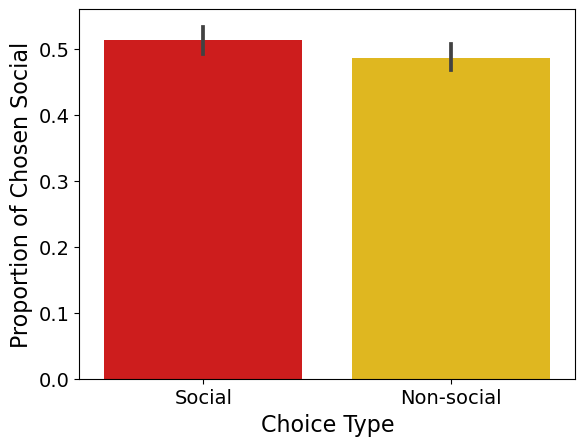

In [17]:
wtp_plot = sns.barplot(x="S_NS", y="prop", data=wtp_long,palette="hot")

wtp_plot.set_xlabel('Choice Type',fontsize=16)
wtp_plot.set_ylabel('Proportion of Chosen Social',fontsize=16)
wtp_plot.tick_params(labelsize=14)
wtp_plot.figure.savefig('study2_choicetype_propsocial.svg')


In [18]:
###################################

In [19]:
#### t stats for sums #####

In [20]:
social_sum= wtpdata.total_spent_social
#calculate group mean for prop of chosen social experiences
social_sum_M = mean(social_sum)
print('mean: %.12f'% (social_sum_M))

mean: 0.753003412969


In [21]:
nonsocial_sum= wtpdata.total_spent_nonsocial
#calculate group mean for prop of chosen social experiences
nonsocial_sum_M = mean(nonsocial_sum)
print('mean: %.12f'% (nonsocial_sum_M))

mean: 0.690307167235


In [22]:
# sum squared difference between observations
d1 = sum([(social_sum[i]-nonsocial_sum[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([social_sum[i]-nonsocial_sum[i] for i in range(n)])
print(d1,d2)

60.78710000000002 18.370000000000005


In [23]:
# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.45191892974426257


In [24]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.026401385775321282


In [25]:
# calculate the t statistic
t_stat = (social_sum_M - nonsocial_sum_M) / sed
print(t_stat)

2.3747331396670006


In [26]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

292


In [27]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=2.375, df=292, cv=1.650, p=0.018
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


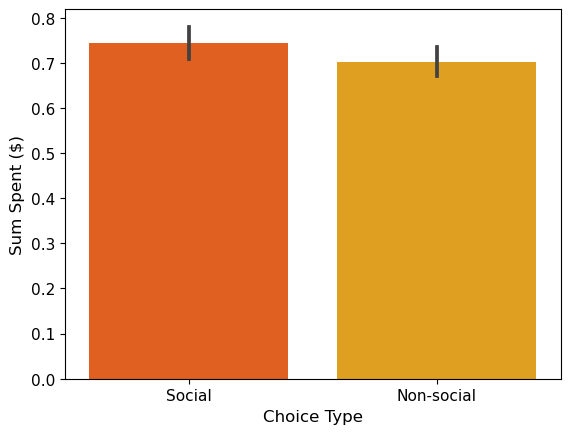

In [28]:
wtp_plot = sns.barplot(x="S_NS", y="sum_spent", data=wtp_long, palette="autumn")
wtp_plot.set_xlabel('Choice Type',fontsize=12)
wtp_plot.set_ylabel('Sum Spent ($)',fontsize=12)
wtp_plot.tick_params(labelsize=11)
wtp_plot.figure.savefig('study2_choicetype_sumspent.svg')

In [29]:
prop_social = wtpdata['prop_social']
aq = wtpdata.AQ #autism quotient
mspss = wtpdata.MSPSS #perceived social support
iri_ec = wtpdata.IRI_EC #iri - empathetic concern
iri_pd = wtpdata.IRI_PD # iri - personal distress
iri_pt = wtpdata.IRI_PT #iri - perspective taking
iri_fs = wtpdata.IRI_FS # iri - fantasy
unified_aff = wtpdata.UM_AFFILIATION
unified_int = wtpdata.UM_INTIMACY

In [30]:
#### sum // self-report ####

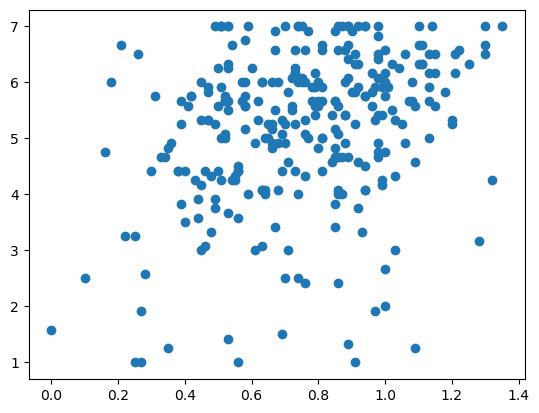

[[0.06611903 0.10257414]
 [0.10257414 1.86671693]]
Pearsons correlation: 0.292
p value: 0.0000
Reject the null hypothesis that the means are equal.


In [31]:
#sum of social / mulitdimensional scale of perceived social support
pyplot.scatter(social_sum, mspss)
pyplot.show()
covariance = cov(social_sum, mspss)
print(covariance)
corr, _ = pearsonr(social_sum, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


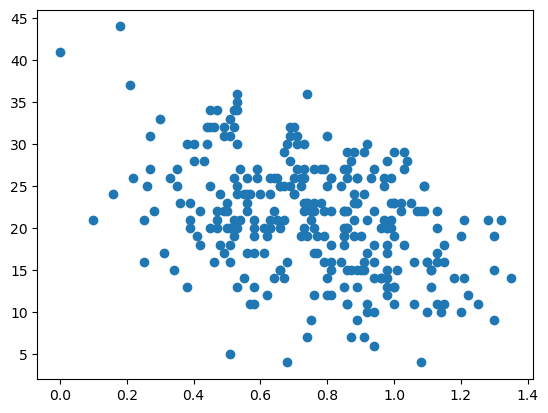

[[ 0.06611903 -0.70200372]
 [-0.70200372 45.8591332 ]]
Pearsons correlation: -0.403
p value: 0.0000
Reject the null hypothesis that the means are equal.


In [ ]:
#sum of social / aq
pyplot.scatter(social_sum, aq)
pyplot.show()
covariance = cov(social_sum, aq)
print(covariance)
corr, _ = pearsonr(social_sum, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

aq_sum= sns.regplot(x="AQ", y="total_spent_social", data=wtpdata,color="orange");
aq_sum.set_ylabel('Sum Spent ($)',fontsize=16)
aq_sum.set_xlabel('Autism Quotient Score)',fontsize=16)
aq_sum.tick_params(labelsize=14)
aq_sum.figure.savefig('study2_sum_aq_scatter.svg')

In [ ]:
#sum of social / iri_pd
pyplot.scatter(social_sum, iri_pd)
pyplot.show()
covariance = cov(social_sum, iri_pd)
print(covariance)
corr, _ = pearsonr(social_sum, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, iri_pd)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


In [ ]:
#sum of social / iri_pt
pyplot.scatter(social_sum, iri_pt)
pyplot.show()
covariance = cov(social_sum, iri_pt)
print(covariance)
corr, _ = pearsonr(social_sum, iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, iri_pt)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [ ]:
#sum of social / iri_ec
pyplot.scatter(social_sum, iri_ec)
pyplot.show()
covariance = cov(social_sum, iri_ec)
print(covariance)
corr, _ = pearsonr(social_sum, iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, iri_ec)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [ ]:
#sum of social / iri_fs
pyplot.scatter(social_sum, iri_fs)
pyplot.show()
covariance = cov(social_sum, iri_fs)
print(covariance)
corr, _ = pearsonr(social_sum, iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, iri_fs)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [ ]:
##### prop of chosen social // self report #####

In [ ]:
#prop of chosen social // MSPSS
pyplot.scatter(prop_social, mspss)
pyplot.show()
covariance = cov(prop_social, mspss)
print(covariance)
corr, _ = pearsonr(prop_social, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
prop_mspss=sns.regplot(x="MSPSS", y="prop_social", data=wtpdata,color="red");
prop_mspss.set_ylabel('Proportion of Social Choices',fontsize=14)
prop_mspss.set_xlabel('Mulitdimensional Scale of Perceived Social Support (MSPSS) score',fontsize=14)
prop_mspss.tick_params(labelsize=14)
prop_mspss.figure.savefig('study2_prop_mspss_scatter.svg')

In [ ]:
# prop social // aq
pyplot.scatter(prop_social, aq)
pyplot.show()
covariance = cov(prop_social, aq)
print(covariance)
corr, _ = pearsonr(prop_social, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, aq)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
prop_aq=sns.regplot(x="AQ", y="prop_social", data=wtpdata,color="red");
prop_aq.set_ylabel('Proportion of Social Choices',fontsize=14)
prop_aq.set_xlabel('Autism Quotient Scores',fontsize=14)
prop_aq.tick_params(labelsize=14)
prop_aq.figure.savefig('study2_prop_aq_scatter.svg')

In [ ]:
# prop social // iri_pd
pyplot.scatter(prop_social, iri_pd)
pyplot.show()
covariance = cov(prop_social, iri_pd)
print(covariance)
corr, _ = pearsonr(prop_social, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, iri_pd)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    

In [ ]:
# prop social // iri_pt
pyplot.scatter(prop_social, iri_pt)
pyplot.show()
covariance = cov(prop_social, iri_pt)
print(covariance)
corr, _ = pearsonr(prop_social, iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, iri_pt)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    


In [ ]:
# prop social // iri_ec
pyplot.scatter(prop_social, iri_ec)
pyplot.show()
covariance = cov(prop_social, iri_ec)
print(covariance)
corr, _ = pearsonr(prop_social, iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, iri_ec)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

prop_iri_ec=sns.regplot(x="IRI_EC", y="prop_social", data=wtpdata,color="orange");
prop_iri_ec.set_ylabel('Proportion of Social Choices',fontsize=16)
prop_iri_ec.set_xlabel('Interpersonal Reactivity Index: Empathic Concern',fontsize=16)
prop_iri_ec.tick_params(labelsize=14)
# prop_iri_ec.figure.savefig('study1_sum_iri_ec_scatter.svg')

In [ ]:
# prop social // iri_fs
pyplot.scatter(prop_social, iri_fs)
pyplot.show()
covariance = cov(prop_social, iri_fs)
print(covariance)
corr, _ = pearsonr(prop_social, iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, iri_fs)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [ ]:
# prop social // unified motives - affiliation
pyplot.scatter(prop_social, unified_aff)
pyplot.show()
covariance = cov(prop_social, unified_aff)
print(covariance)
corr, _ = pearsonr(prop_social, unified_aff)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, unified_aff)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [ ]:
# prop social // unified motives - intimacy
pyplot.scatter(prop_social, unified_int)
pyplot.show()
covariance = cov(prop_social, unified_int)
print(covariance)
corr, _ = pearsonr(prop_social, unified_int)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, unified_int)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')